<a href="https://colab.research.google.com/github/emma-rose22/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 5.5, 5, 5, 33], 
                 index=range(1,11))


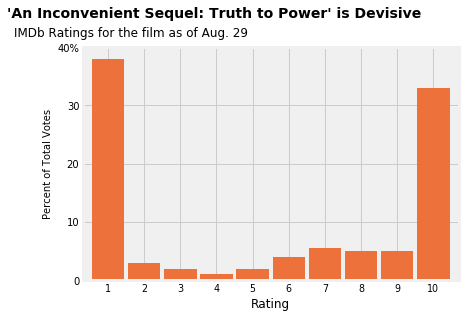

In [30]:

#we are just making a basic thing to get started
fig, ax = plt.subplots()
#this is letting you do things on the figure
#and also axes 

#still need to extend x axis ticks
#change color of bars (in notes)


#make the background white
fig.patch.set(facecolor='white')

#this puts bars on the plot
fake.plot.bar(width= 0.9, color = '#ED713A')

#set axes backfound color
ax.set

#title
ax.set_title("'An Inconvenient Sequel: Truth to Power' is Devisive", fontsize=14, fontweight='bold', x=.35, y=1.1)
#the inner quoues re what will show up 

#y label text
ax.set_ylabel('Percent of Total Votes', fontsize=10)

#x label text 
ax.set_xlabel('Rating', fontsize=12)

#sub title tedxt
ax.text(s='IMDb Ratings for the film as of Aug. 29',y=41.8, x=-2.6, fontsize=12 )
#we made a raw text thing that is the same as our labels, 
#without that direction in place, so we can manipulate it

#here we set the ticks and labels for y axis
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks([0, 10, 20, 30, 40])

#tick labels for x axis
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=9.5)
#ax.set_xticks(length=5)

#remove spines
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)

plt.show() #this line tells matplot you are done


In [14]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

#My own creation

In [32]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/03/roeder-pepe-dankpepe1.png?w=1150'
example2 = Image(url=url, width=400)

display(example2)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')


pepe = pd.Series([0, 0, 0, 0.3, 0.4, 5, 20, 6, 3, 30, 20, 20, 4, 20, 150, 1, 115, 50, 60, 190, 20, 100, 75, 10, 50, 115, 595],
    index=range(1,28))
  
dots = [0, 0, 0, 0.3, 0.4, 5, 20, 6, 3, 30, 20, 20, 4, 20, 150, 1, 115, 50, 60, 190, 20, 100, 75, 10, 50, 115, 595]
#([0, 0, 0, 0.3, 0.4, 5, 20, 6, 3, 30, 20, 20, 4, 20, 150, 1, 115, 50, 60, 190, 20, 100, 75, 10, 50, 115, 595]
#[' ','OCT. 2016', "JAN. '17", 'APR.', 'JUL.', 'OCT.', "JAN. '18"]


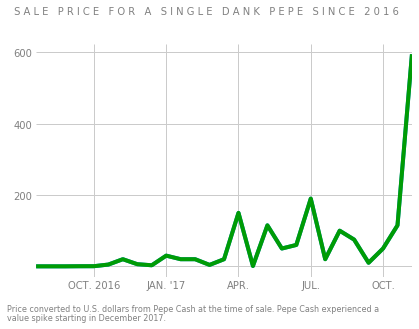

In [162]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.set(facecolor='white')

#this puts bars on the plot
pepe.plot.line()

#change color
pepe.plot.line(color = '#009C05')
#pepe.plot.line(linewidth='#009C05')

#sets title
ax.set_title(' S A L E   P R I C E   F O R   A   S I N G L E   D A N K   P E P E   S I N C E   2 0 1 6', fontsize=10, y=1.1, x=.45, color='grey')

#sets y axis
ax.set_yticklabels(['', '200', '400', '600'], fontsize=10, color='grey')
ax.set_yticks([0, 200, 400, 600])

#sets x axis
ax.set_xticklabels([' ','OCT. 2016', "JAN. '17", 'APR.', 'JUL.', 'OCT.', "JAN. '18"], fontsize= 10, color='grey')
#ax.set_xticks([1,28])

#subtext
ax.text(s='Price converted to U.S. dollars from Pepe Cash at the time of sale. Pepe Cash experienced a', x=-1, y=-125, fontsize=8, color='grey')
ax.text(s='value spike starting in December 2017.', x=-1, y=-150, fontsize= 8, color='grey')

#get rid of those spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#circles?
#def circle(x, y, radius=0.05):
    #from matplotlib.patches import Circle
    #from matplotlib.patheffects import withStroke
    #circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    #edgecolor='#009C05', facecolor=(0, 0, 0, .0125),
                    #path_effects=[withStroke(linewidth=5, foreground='w')])
    #ax.add_artist(circle)
    


plt.show()

In [0]:
fontname : {'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}

In [65]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/03/roeder-pepe-dankpepe1.png?w=1150'
example2 = Image(url=url, width=400)

display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here